In [1]:
## Netflix Movies simple recommender system

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
# to import netflix dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/n_movies.csv')

In [6]:
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [7]:
# to check for missing values in dataset
df.isnull().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64

In [8]:
# to check for duplicated values
duplicates = df[df.duplicated()]

In [26]:
# there are no duplicates in dataset
duplicates

,title,year,certificate,duration,genre,rating,description,stars,votes


In [27]:
# to check if variables are the correct data types
# to convert votes into numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


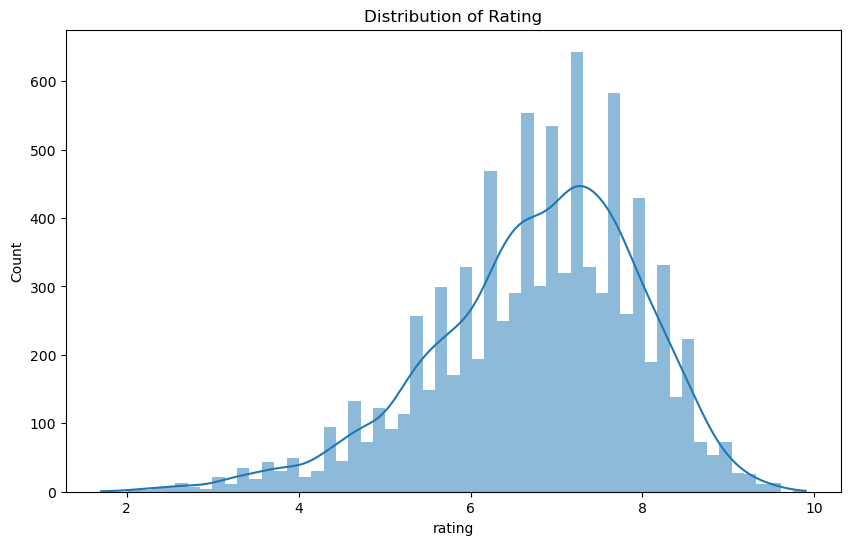

In [11]:
# to plot an histogram of continous variable 'rating'
plt.figure(figsize=(10,6), dpi=100)
sns.histplot(data=df, x='rating', kde=True, edgecolor=None)
plt.title('Distribution of Rating');

In [28]:
# exploratory data analysis
# to print movie titles with the highest average rating
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
1899                               9.600000
Breaking Bad                       9.500000
Story Time Book: Read-Along        9.400000
Elesin Oba: The King's Horseman    9.400000
Cosmos: A Spacetime Odyssey        9.300000
Our Planet                         9.300000
Reply 1988                         9.200000
Dark                               9.111111
The Last Dance                     9.100000
Hans Zimmer Live in Prague         9.100000
Name: rating, dtype: float64

In [32]:
df['votes'] = df['votes'].str.replace(',','')

In [34]:
df['votes']

0       177031
1       199885
2       501384
3         9773
4        15413
         ...  
9952      3130
9953    970067
9954    199898
9955    439601
9956      9786
Name: votes, Length: 9957, dtype: object

In [36]:
# to convert 'votes' to numeric variable
df['votes'] = pd.to_numeric(df['votes'])

In [52]:
df['votes']

0       177031.0
1       199885.0
2       501384.0
3         9773.0
4        15413.0
          ...   
9952      3130.0
9953    970067.0
9954    199898.0
9955    439601.0
9956      9786.0
Name: votes, Length: 9957, dtype: float64

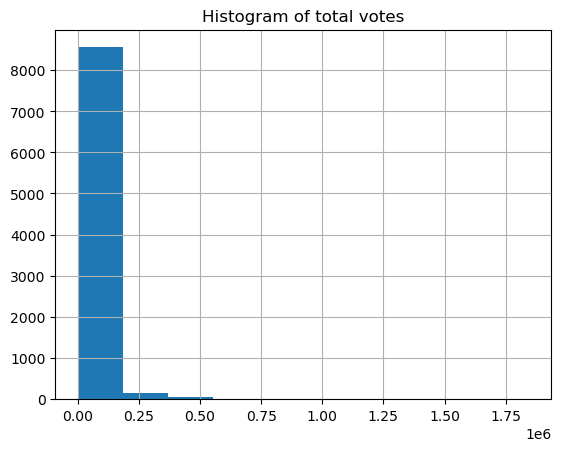

In [57]:
df['votes'].hist()
plt.title('Histogram of total votes');

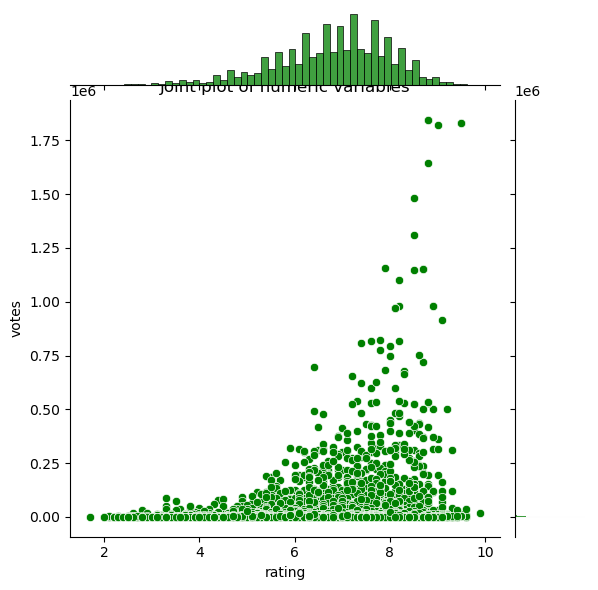

In [60]:
sns.jointplot(data=df, x='rating', y='votes', color='green')
plt.title('Joint plot of numeric variables');

In [43]:
# to print movies with the highest vote
df.groupby('title')['votes'].sum().sort_values(ascending=False).head(10)

title
The Lord of the Rings: The Fellowship of the Ring    3688130.0
Breaking Bad                                         3662699.0
Stranger Things                                      2477471.0
Friends                                              1958852.0
The Walking Dead                                     1940127.0
The Lord of the Rings: The Return of the King        1819157.0
The Lord of the Rings: The Two Towers                1642708.0
Gladiator                                            1481531.0
The Departed                                         1310171.0
Titanic                                              1158746.0
Name: votes, dtype: float64

In [44]:
# to calculate the mean of the vote average column
# the average rating of a movie on IMDB is about 6.76 on a scale of 10
C = df['rating'].mean()
C

6.764515027322403

In [45]:
# to calculate the number of votes received by movie in the 90th percentile using the .quantile() method
# 30836.19 is the minimum number of votes required to be in the chart
m = df['votes'].quantile(0.9)
m

30836.199999999993

In [25]:
df['votes']

0       177,031
1       199,885
2       501,384
3         9,773
4        15,413
         ...   
9952      3,130
9953    970,067
9954    199,898
9955    439,601
9956      9,786
Name: votes, Length: 9957, dtype: object

In [46]:
# to filter out movies having greater than equal to 30836.19 vote counts
# to create a copy of df dataframe using the copy() method
# it uses the loc method to select rows where the value in the vote_count is >= m and assigning it to new df: q_movies
q_movies = df.copy().loc[df['votes']>=m]
q_movies.shape

(879, 9)

In [47]:
# q_movies, there are around 8.8% movies with vote count more than 30836.1 and qualified to be on the list
df.shape

(9957, 9)

In [50]:
# most important step: to calculate the weighted rating for each qualified movie
# Define a function, weighted_rating():
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['votes']
    R = x['rating']
      # Calculation based on the IMDB formula
    return (v/(v+m)* R) + (m/(m+v) * C)

In [61]:
# to define a new feature 'score' and calculate its value with 'weighted rating'
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [62]:
# to print first 15 movies
q_movies[['title','votes','rating','score']].head(15)

,title,votes,rating,score
0,Cobra Kai,177031.0,8.5,8.242548
1,The Crown,199885.0,8.7,8.441320
2,Better Call Saul,501384.0,8.9,8.776273
5,The Sandman,116358.0,7.8,7.583073
6,Rick and Morty,502160.0,9.2,9.059096
7,Breaking Bad,1831340.0,9.5,9.454702
10,Stranger Things,1149889.0,8.7,8.649452
12,The Walking Dead,970060.0,8.1,8.058856
18,Peaky Blinders,531058.0,8.8,8.688295
19,Fate: The Winx Saga,43179.0,6.9,6.843554


In [63]:
df['description'].head()

0    Decades after their 1984 All Valley Karate Tou...
1    Follows the political rivalries and romance of...
2    The trials and tribulations of criminal lawyer...
3    When a psychiatrist shelters a mysterious cult...
4    A Street Kid trying to survive in a technology...
Name: description, dtype: object

In [64]:
# to import TFIdfVectoriser from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
# to define a TF-IDF Vectoriser object. Removes all english stop words
tfidf= TfidfVectorizer(stop_words='english')

In [66]:
# to replace NaN with an empty string
df['description'] = df['description'].fillna('')

In [67]:
# to construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

In [68]:
# to output the shape of tdif_matrix
tfidf_matrix.shape

(9957, 22061)

In [69]:
# array mapping from feature integer indices to feature name
# [5000:5010] slice is used to get the feature names for the indices between 5000 and 5010 (exclusive).
# https://stackoverflow.com/questions/70215049/attributeerror-tfidfvectorizer-object-has-no-attribute-get-feature-names-out
tfidf.get_feature_names_out()[5000:5010]

array(['darwen', 'darwin', 'darwinian', 'darín', 'das', 'dash', 'dashed',
       'dashing', 'dashkin', 'dass'], dtype=object)

In [70]:
# to import linear kernel
from sklearn.metrics.pairwise import linear_kernel

In [71]:
# to compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [72]:
cosine_sim.shape

(9957, 9957)

In [73]:
# to access the element at index 1 in the variable cosine_sim
# By accessing the element at index 1, the code is retrieving the cosine similarity score between the second set of data and the first set of data.
cosine_sim[1]

array([0., 1., 0., ..., 1., 0., 0.])

In [74]:
# to construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [75]:
# to return the first 10 elements of the list.
indices[:10]

title
Cobra Kai                 0
The Crown                 1
Better Call Saul          2
Devil in Ohio             3
Cyberpunk: Edgerunners    4
The Sandman               5
Rick and Morty            6
Breaking Bad              7
The Imperfects            8
Blonde                    9
dtype: int64

In [76]:
# to build a simple movie recommender system
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [88]:
# to return a list of recommended movies for 'The Dark Knight'
# the simple recommender system has done a decent job at finding movies with similar plot, but the quality of recommendation 
# is not great
get_recommendations('Gladiator')

8459                  Roman Empire
1089                          Ezel
370                        Revenge
6412                Heebie Jeebies
7067                 Devil May Cry
1004    Once Upon a Time in Mexico
985                   Roman Empire
5919            Like Cotton Twines
3957       Empresses in the Palace
8460                  Roman Empire
Name: title, dtype: object

In [91]:
get_recommendations('Titanic')

9641                  Inventing Anna
5547                1 Chance 2 Dance
2354                   Mr. Roosevelt
4338    Komt een vrouw bij de dokter
1943              Kotaro Lives Alone
4734                 Eromanga Sensei
5053                        Pompidou
9321              Unsolved Mysteries
1266                          Code 8
4495                     First Class
Name: title, dtype: object

In [94]:
get_recommendations('The Lord of the Rings: The Return of the King')

78                  The Lord of the Rings: The Two Towers
3482                              Godzilla Singular Point
174                             Star Wars: The Clone Wars
20      The Lord of the Rings: The Fellowship of the Ring
9921    The Lord of the Rings: The Fellowship of the Ring
2932                                   Planet of the Dead
1174                        The Rising of the Shield Hero
2493                                             #BlackAF
449                                              Atypical
2780                              Svaha: The Sixth Finger
Name: title, dtype: object

In [102]:
# Netflix Top most voted movies
most_votes = df.groupby('title')['votes'].sum().sort_values(ascending=False).head(15)

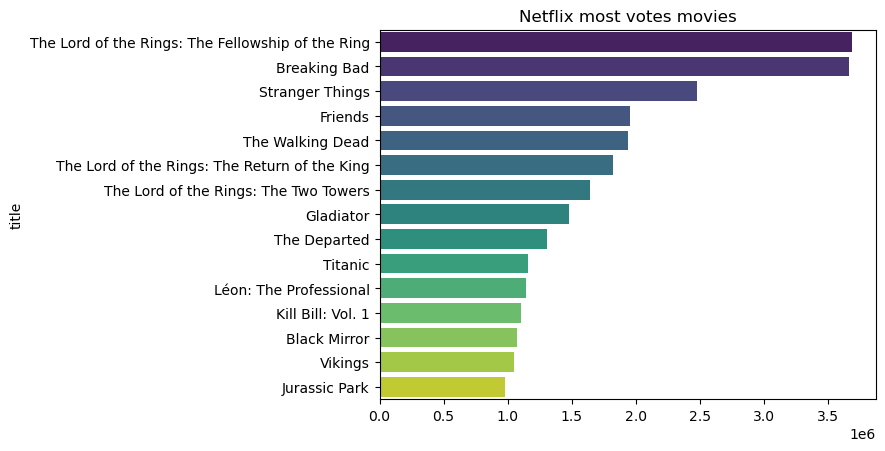

In [113]:
# to visualise in a barplot
sns.barplot(x=most_votes.values, y=most_votes.index, palette='viridis')
plt.title('Netflix most votes movies');

In [111]:
# Netflix Top most voted movies
highest_rating = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(15)

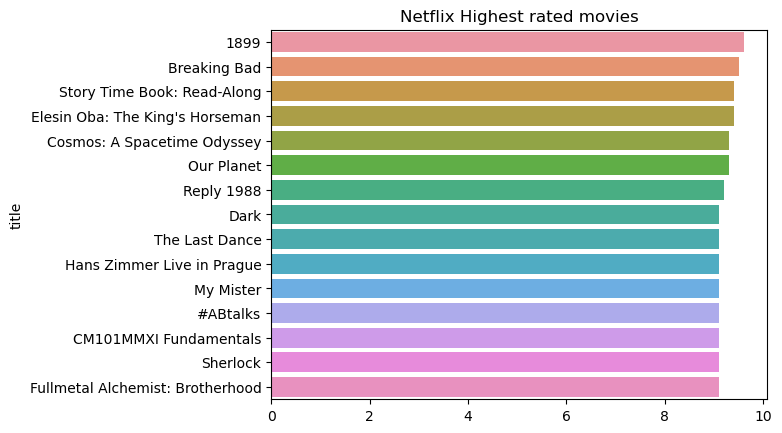

In [114]:
sns.barplot(x=highest_rating.values, y=highest_rating.index)
plt.title('Netflix Highest rated movies');